# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# Is the distribution of body temperatures normal?

First, let's import what we need, and take a look at the head of the dataframe.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [21]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


Next, let's plot the histogram of the temperatures to get a feel for the distribution. Let's also get the summary statistics for the data.

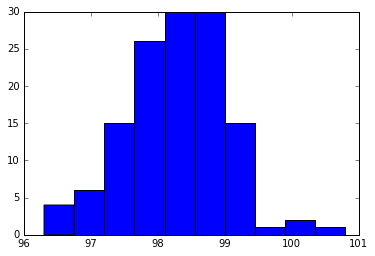

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64


In [26]:
plt.hist(df['temperature'],bins=10)
plt.show()
print(df['temperature'].describe())

The data may be a little skewed to the right, so let's run a Shapiro-Wilk test. The output is (test statistic, p-value). If the p-value > 0.05, then this indicates normality.


In [27]:
stats.shapiro(df['temperature'])

(0.9865769743919373, 0.2331680953502655)

We can assume normality since the p-value was approximately .233 which is > 0.05

# Is the sample size large? Are the observations independent?

The sample size is large enough (n = 130 >= 30) to exceed the "rule of thumb" of 30 samples. We can use the 10% rule to assume independence (n < 10% of population size).

# Is the true population mean really 98.6 degrees F?

First, let's try a bootstrap hypothesis test. We setup our hypothesis, H0: The true mean temperature is 98.6 degrees.
Next, we need to shift our sample mean to match the true mean.

In [49]:
sample_mean = 98.249231
shifted_sample = df['temperature'] - np.mean(df['temperature']) + 98.6

We can now use bootstrapping on this shifted data to simulate data acquisition under the null hypothesis.

In [56]:
# Create functions to perform bootstrapping

def diff_from_null(data, null_mean=98.6):
    return np.mean(data) - null_mean

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size=size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

diff_obs = diff_from_null(sample_mean)

diff_obs

-0.35076899999999966

In [60]:
bs_replicates = draw_bs_reps(shifted_sample,diff_from_null,1000000)
p_value = np.sum(bs_replicates <= diff_obs) / 1000000
p_value

0.0

This p-value is very low considering we took 1,000,000 bs_replicates. Therefore, we should reject H0. There is very strong evidence to suggest that the true mean temperature is not 98.6 degrees.

Now, let's try frequentist statistical testing. We will use a one-sample test since we are comparing one set of data to a single number. In this case, it is appropriate to use a t-statistic since we do not know the population standard deviation, but we can calculate the sample standard deviation (and already have).

In [24]:
# Calculate the t-statistic
t = (98.249231 -  98.6)/((0.733183)/np.sqrt(130))
print(t)

-5.45482087946


Using a p-value calculator for a two-tailed t-test, we get that p < 0.00001

# Draw a small sample of size 10 from the data and repeat both frequentist tests.

The correct test to use in this instance would be a one-sample z-test since we are drawing from a population (which happens to be our original sample), but still comparing one set of data to 98.6. First, let's draw a sample of 10 from our population, and get summary statistics for the sample.

In [75]:
sample10 = np.random.choice(df['temperature'], 10)
sample10

array([ 98.4,  98.7,  98.5,  98.7,  98.7,  98.8,  97.1,  97.7,  97.9,  98.4])

In [76]:
print(np.mean(sample10))
print(np.std(sample10))

98.29
0.524309069157


In [84]:
# One sample test:
z = (98.29 - 98.6)/(0.733183 / np.sqrt(10))
z

-1.3370551071862822

Looking at the z-table, our z-score gives us and area of .0901, but since this is a two-tailed test, we multiply by 2 to get .1802. Since this exceeds our alpha level of 0.05, we fail to reject H0. Using this test, we do not have sufficient evidence to claim that the average temperature is not 98.6.

# At what temperature should we consider someone's temperature to be "abnormal"?

In [87]:
# Compute the 95% confidence interval

unshifted = np.percentile(bs_replicates, [2.5,97.5])
unshifted + 98.6 - 0.35076899999999966

array([ 98.12384638,  98.37461562])

As seen above, our 95% CI is (98.12384638,  98.37461562). Anything outside of this interval we can consider to be "abnormal".

# Is there a significant difference between males and females in normal temperature?

We will use a hypothesis test for difference of means to solve this problem, since we are comparing the means of two different groups. First, let's split the dataframe into two based on gender.

In [89]:
males = df[df['gender'] == 'M']
females = df[df['gender'] == 'F']

We setup our null hypothesis to be H0: (mean of male temperature) - (mean of female temperature) = 0. We setup our alternative hypothesis to be HA: (mean of male temperature) - (mean of female temperature) != 0. First, let's calculate mean and standard deviation for both groups.

In [93]:
male_mean = np.mean(males['temperature'])
male_std = np.std(males['temperature'])
female_mean = np.mean(females['temperature'])
female_std = np.std(females['temperature'])

In [99]:
# Subtract female mean from male mean
mf_mean = male_mean - female_mean

In [98]:
# Find stdev of male mean - female mean
mf_std = np.sqrt((((male_std)**2)/65) + (((female_std)**2)/65))

We need to find our critical z-value (2-tailed). We look at the z-table to find that for a 5% alpha level, we need a critical value of +-1.96. Multiplying this by our mf_std gives us a value in which we can compare our male_mean - female_mean statistic. Since our mf_mean is negative, we will use -1.96.

In [100]:
mf_std * -1.96

-0.24613030301613179

This tells us that there is a 5% chance of us getting a value of +-0.24613030301613179, given that the null hypothesis is true.

In [101]:
mf_mean

-0.28923076923076962

The observed statistic above leads us to reject our null hypothesis. Therefore, there is strong evidence to suggest that, on average, male body temperature and female body temperature are significantly different.